### Machine Learning Cookbook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# creating a vector as a row
vector_row = np.array([1,2,3])
# as a column
vector_column = np.array([[1],
                        [2],
                        [3]])



In [3]:
# sparse matrix (reduce una matrix de muchos ceros a nonzeros)
from scipy import sparse
matrix = np.array([[0, 0],
                    [0, 1],
                    [3, 0]])
matrix_sparse = sparse.csr_matrix(matrix)
print(matrix)
print(matrix_sparse)

[[0 0]
 [0 1]
 [3 0]]
  (1, 1)	1
  (2, 0)	3


### Panda

In [4]:
from sklearn import datasets

digits = datasets.load_digits()
features = digits.data
features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
target = digits.target
target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
from sqlalchemy import create_engine
import sqlite3
import pandas as pd
# Create your connection.
cnx = sqlite3.connect(r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\Curso_Udemy_SQL\sakila.db")

df = pd.read_sql_query("SELECT * FROM customer", cnx)
df.head(3)

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2019-04-11 18:11:49
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000,2019-04-11 18:11:49
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2019-04-11 18:11:49


In [7]:
df_store = pd.read_sql_query("select store_id, count(*) as total,avg(active) as media_activos from customer group by 1 order by 2",cnx)

df_store

                               

,store_id,total,media_activos
0,2,273,0.974359
1,1,326,0.975460


In [8]:
# group by
url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\Titanic\titanic.csv"
dataframe = pd.read_csv(url)
dataframe.groupby(["Sex","Survived"])["Age"].mean()

Sex     Survived
female  0           24.419753
        1           28.866953
male    0           31.136853
        1           27.428165
Name: Age, dtype: float64

In [9]:
# grouping by time
# create date range
time_index = pd.date_range("06/06/2017",periods=100000,freq="30S") # cada 30 segundos
# create dataframe
datadate = pd.DataFrame(index=time_index)
# create column with random values
datadate["Sale_Amount"] = np.random.randint(1,10,100000)
datadate.head(3)

,Sale_Amount
2017-06-06 00:00:00,8
2017-06-06 00:00:30,1
2017-06-06 00:01:00,3


In [10]:
# group by week
datadate.resample("M",label="left").sum() # label, muestra el primer dia desde que se cuenta

,Sale_Amount
2017-05-31,359463
2017-06-30,140148


In [11]:
# show first two names uppercased
[name.upper() for name in dataframe["Name"][:2]]

['MR. OWEN HARRIS BRAUND',
 'MRS. JOHN BRADLEY (FLORENCE BRIGGS THAYER) CUMINGS']

In [12]:
#Applying a Function Over All Elements in a Column
def uppercase(x):
    return x.upper()

dataframe["Name"].apply(uppercase)[:2]

0                               MR. OWEN HARRIS BRAUND
1    MRS. JOHN BRADLEY (FLORENCE BRIGGS THAYER) CUM...
Name: Name, dtype: object

In [13]:
# apply y group by
dataframe.groupby("Sex").apply(lambda x:x.mean())  

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Sex,,,,,,
female,0.742038,2.159236,27.719745,0.694268,0.649682,44.479818
male,0.190227,2.385689,30.431361,0.432810,0.237347,25.633935


In [14]:
# create a row and append to dataframe
row = pd.Series([10,"Chris","Chillon"],index=["id","frist","last"])
#dataframe_a.append(row,ignore_index=True)

### Handling Numerical Data

In [15]:
#You need to rescale the values of a numerical feature to be between two values
from sklearn import preprocessing

feature = np.array([[-500.5],
[-100.1],
[0],
[100.1],
[900.9]])
# create scaler
minmax_Scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_feature = minmax_Scaler.fit_transform(feature)
scaled_feature
                     

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

3.1434799999999994


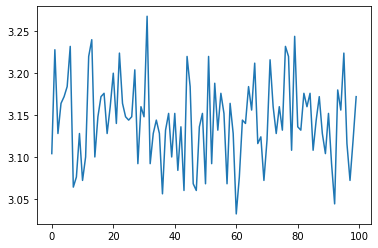

In [16]:
# monte carlo
pi_avg = 0
n = 1000
pi_value_list = []
for i in range(100):
    value = 0
    x = np.random.uniform(0,1,n).tolist()
    y = np.random.uniform(0,1,n).tolist()
    for j in range(n):
        z = np.sqrt(x[j]*x[j] + y[j]*y[j])
        if z <=1:
            value +=1
    float_value = float(value)
    pi_value = float_value * 4 /n
    pi_value_list.append(pi_value)
    pi_avg += pi_value

pi = pi_avg/100

print(pi)
plt.plot(pi_value_list)
plt.show()


In [17]:
dataframe.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

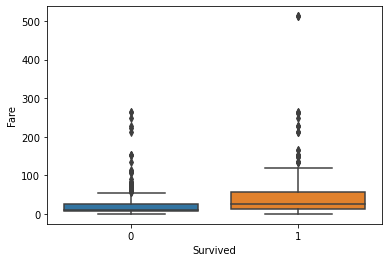

In [18]:
sns.boxplot(x="Survived",y="Fare",data=dataframe)

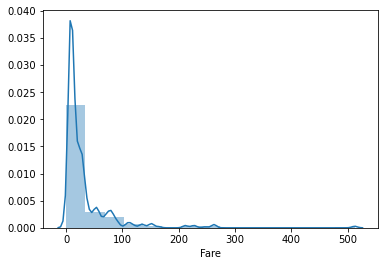

In [19]:
sns.distplot(dataframe["Fare"],bins=15,kde=True)

In [20]:
#outliers
from sklearn.covariance import EllipticEnvelope
fares = dataframe[["Fare"]]
outlier_detection = EllipticEnvelope(contamination=.1)
outlier_detection.fit(fares)
outliers = outlier_detection.predict(fares)


In [21]:
type(outliers)

numpy.ndarray

In [22]:
dataframe["Outliers_fare"] = outliers.tolist()

In [23]:
dataframe[dataframe["Outliers_fare"] == -1]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Outliers_fare
27,0,1,Mr. Charles Alexander Fortune,male,19.0,3,2,263.0000,-1
31,1,1,Mrs. William Augustus (Marie Eugenie) Spencer,female,48.0,1,0,146.5208,-1
34,0,1,Mr. Edgar Joseph Meyer,male,28.0,1,0,82.1708,-1
60,1,1,Miss. Amelie Icard,female,38.0,0,0,80.0000,-1
61,0,1,Mr. Henry Birkhardt Harris,male,45.0,1,0,83.4750,-1
...,...,...,...,...,...,...,...,...,...
825,1,1,Mrs. George Nelson (Martha Evelyn) Stone,female,62.0,0,0,80.0000,-1
831,1,1,Miss. Sara Rebecca Compton,female,39.0,1,1,83.1583,-1
845,1,1,Mrs. Samuel L (Edwiga Grabowska) Goldenberg,female,40.0,1,0,89.1042,-1
852,1,1,Mrs. George Dennick (Mary Hitchcock) Wick,female,45.0,1,1,164.8667,-1


In [24]:
# with range (iqr)
def indices_of_outliers(x):
    q1,q3 = np.percentile(x,[25,75])
    iqr = q3-q1
    lower_bound = q1 -(iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

indices_of_outliers(dataframe["Fare"])


(array([  1,  27,  31,  34,  51,  60,  61,  71,  87, 101, 117, 119, 123,
        138, 150, 158, 179, 194, 200, 214, 217, 223, 229, 244, 255, 256,
        257, 260, 266, 267, 273, 288, 289, 295, 297, 303, 304, 305, 308,
        309, 316, 317, 322, 323, 330, 332, 334, 335, 339, 364, 367, 371,
        373, 375, 378, 383, 388, 391, 410, 432, 435, 442, 450, 481, 483,
        493, 495, 501, 502, 517, 524, 534, 537, 541, 547, 554, 555, 578,
        582, 584, 588, 606, 624, 638, 642, 652, 656, 657, 662, 676, 678,
        686, 695, 697, 705, 713, 726, 733, 737, 738, 741, 755, 759, 761,
        775, 785, 788, 798, 816, 825, 831, 842, 845, 852, 859, 875],
       dtype=int64),)

In [25]:
type(indices_of_outliers(dataframe["Fare"])[0])

numpy.ndarray

In [26]:
outlier2 = indices_of_outliers(dataframe["Fare"])[0]
filter_df = dataframe[dataframe.index.isin(outlier2)]
filter_df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Outliers_fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1
27,0,1,Mr. Charles Alexander Fortune,male,19.0,3,2,263.0000,-1
31,1,1,Mrs. William Augustus (Marie Eugenie) Spencer,female,48.0,1,0,146.5208,-1
34,0,1,Mr. Edgar Joseph Meyer,male,28.0,1,0,82.1708,-1
51,1,1,Mrs. Henry Sleeper (Myna Haxtun) Harper,female,49.0,1,0,76.7292,1
...,...,...,...,...,...,...,...,...,...
842,0,3,Mr. Douglas Bullen Sage,male,18.0,8,2,69.5500,1
845,1,1,Mrs. Samuel L (Edwiga Grabowska) Goldenberg,female,40.0,1,0,89.1042,-1
852,1,1,Mrs. George Dennick (Mary Hitchcock) Wick,female,45.0,1,1,164.8667,-1
859,0,3,Miss. Dorothy Edith Sage,female,14.0,8,2,69.5500,1


### Discretizating Features

In [27]:
from sklearn.preprocessing import Binarizer
age = np.array([[6],
[12],
[20],
[36],
[65]])

binarizer = Binarizer(18)
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [28]:
np.digitize(age,bins=[20,30,40])

array([[0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)

In [30]:
## grouping observations
from sklearn.cluster import KMeans

df_num = dataframe.describe().columns.tolist()
copy_df = dataframe[df_num]

clusters = KMeans(4,random_state=0)
clusters.fit(copy_df)
copy_df["cluster"] = clusters.predict(copy_df)


In [31]:
clusters.labels_[:10]

array([0, 2, 0, 2, 0, 0, 2, 0, 0, 0])

In [32]:
copy_df["cluster"].value_counts()

0    721
2    135
1     28
3      3
Name: cluster, dtype: int64

In [33]:
for i in range(0,4):
    print("\nel numero de grupo es: ",i )
    print("_"*30)
    print(copy_df[copy_df["cluster"] == i].mean())


el numero de grupo es:  0
______________________________
Survived                    0.320388
Pclass                      2.554785
Age                        28.269417
Siblings/Spouses Aboard     0.432732
Parents/Children Aboard     0.337032
Fare                       15.303588
Outliers_fare               1.000000
cluster                     0.000000
dtype: float64

el numero de grupo es:  1
______________________________
Survived                     0.678571
Pclass                       1.000000
Age                         32.747143
Siblings/Spouses Aboard      0.714286
Parents/Children Aboard      1.107143
Fare                       204.948064
Outliers_fare               -1.000000
cluster                      1.000000
dtype: float64

el numero de grupo es:  2
______________________________
Survived                    0.659259
Pclass                      1.274074
Age                        35.081481
Siblings/Spouses Aboard     0.992593
Parents/Children Aboard     0.481481
Fare       

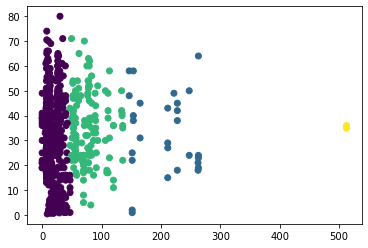

In [34]:
plt.scatter(x="Fare",y="Age",c="cluster",data=copy_df)

### imputing missing values

In [35]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [38]:
features,_=make_blobs(n_samples=1000,
                    n_features=2,
                    random_state=1)
#standarizar
scaler = StandardScaler()
standar_features = scaler.fit_transform(feature)
# replace first feature with missing value
true_value = standar_features[0,0]
standar_features[0,0] = np.nan
#predict
imputer = KNNImputer(n_neighbors=5)
imput_data = imputer.fit_transform(standar_features)

In [39]:
print("True value: ",true_value)
print("Input value: ",imput_data[0,0])

True value:  -1.266870882158505
Input value:  0.3167177205396262


In [40]:
standar_features

array([[        nan],
       [-0.39316683],
       [-0.17474081],
       [ 0.0436852 ],
       [ 1.79109332]])

In [43]:
dataframe2 = pd.DataFrame({"Score": ["Low", "Low", "Medium", "Medium", "High"]})
#mapper
#Create mapper
scale_mapper = {"Low":1,
"Medium":2,
"High":3}
# Replace feature values with scale
dataframe2["Score"].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: Score, dtype: int64